### step 1-import libraries & load data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\RIJUL\Downloads\telecom_churn_data.csv",header=None,skiprows=1)
print(df.shape)
df.head()

(1000, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   object 
 1   1       1000 non-null   int64  
 2   2       1000 non-null   int64  
 3   3       1000 non-null   object 
 4   4       1000 non-null   object 
 5   5       1000 non-null   object 
 6   6       1000 non-null   int64  
 7   7       1000 non-null   float64
 8   8       1000 non-null   int64  
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   int64  
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   int64  
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   int64  
 18  18      1000 non-null   float64
 19  19      1000 non-null   int64  
 20  20      1000 non-null   object 
dtypes: float64(8), int64(8), object(5)
mem

### STEP 2 — Data Cleaning & preprocessing

In [81]:
#Rename columns
df.columns = [
    'State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
    'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
    'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
    'CustServ_Calls', 'Churn'
]

In [82]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [83]:
# clean target column
df['Churn'] = df['Churn'].str.strip().map({'True.': 1, 'False.': 0})

In [84]:
# Encode categorical variables
df['International_Plan'] = df['International_Plan'].str.strip().map({'yes': 1, 'no': 0})
df['VMail_Plan'] = df['VMail_Plan'].str.strip().map({'yes': 1, 'no': 0})
df.drop(['Phone', 'State'], axis=1, inplace=True)

### step4-Exploratory Data Analysis (EDA)

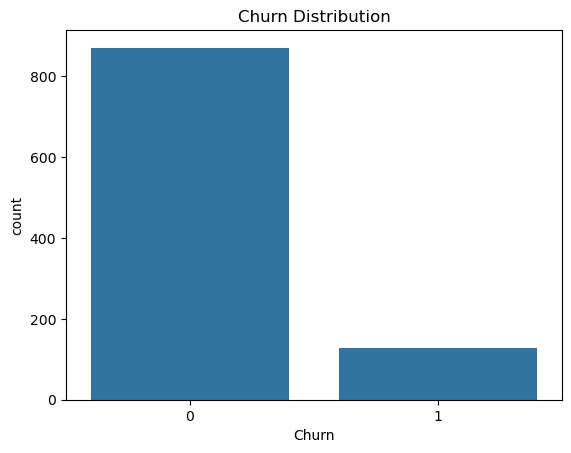

In [85]:
# CHurn Distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

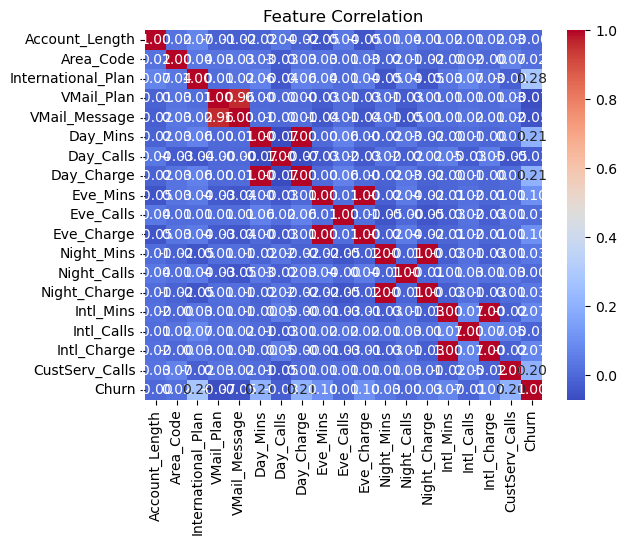

In [86]:
# correlation heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### Step5-Feature Engineering

In [87]:
# Features & Target split
X = df.drop('Churn', axis=1)
y = df['Churn']

In [88]:
# Test and train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step6 - Model building

In [89]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with more iterations
model = LogisticRegression(max_iter=2000, solver='lbfgs') 
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[161   5]
 [ 28   6]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       166
           1       0.55      0.18      0.27        34

    accuracy                           0.83       200
   macro avg       0.70      0.57      0.59       200
weighted avg       0.80      0.83      0.80       200



In [90]:
# Random forest(improved)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       166
           1       0.95      0.59      0.73        34

    accuracy                           0.93       200
   macro avg       0.94      0.79      0.84       200
weighted avg       0.93      0.93      0.92       200



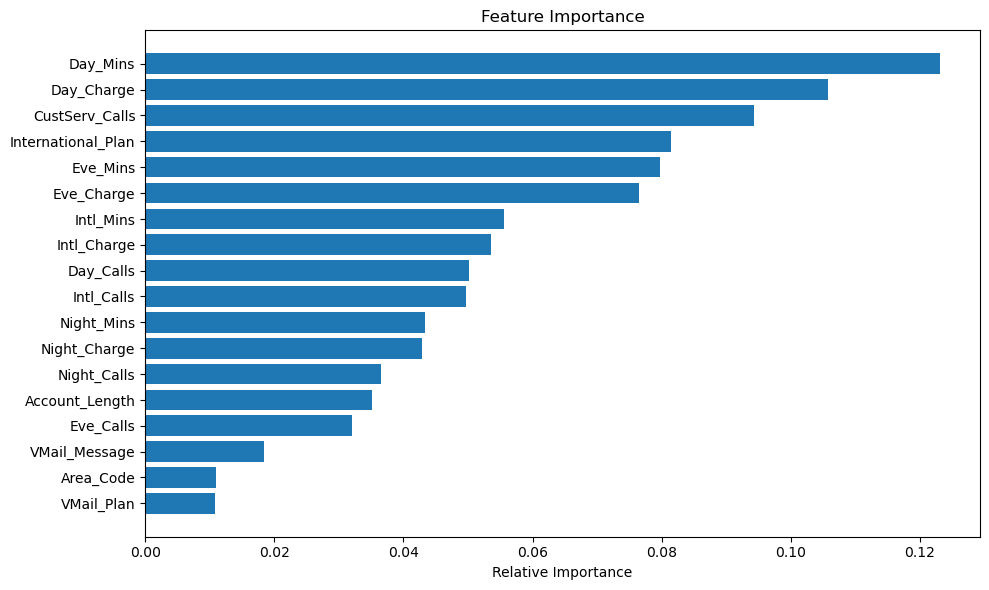

In [91]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

### Step7- Churn scoring

In [92]:
df['Churn_Probability'] = rf.predict_proba(X)[:, 1]
df['CHURN_FLAG'] = rf.predict(X)
# Sort by churn probability
high_risk = df.sort_values(by='Churn_Probability', ascending=False)
print(high_risk[['Churn_Probability', 'CHURN_FLAG']].head(10))

     Churn_Probability  CHURN_FLAG
605               0.97           1
156               0.97           1
715               0.96           1
987               0.95           1
830               0.94           1
331               0.93           1
465               0.93           1
491               0.92           1
306               0.92           1
792               0.92           1


In [93]:
high_risk_customers = df[df['Churn_Probability'] > 0.8]
print(high_risk_customers[['Account_Length', 'CustServ_Calls', 'Churn_Probability']].head())

     Account_Length  CustServ_Calls  Churn_Probability
15              161               4               0.86
21               77               5               0.86
41              135               0               0.87
77              144               4               0.85
115              36               0               0.89


### step8- Campaign target

In [94]:
# Customers likely to churn
churn_targets = df[df['CHURN_FLAG'] == 1]
churn_targets[['Account_Length', 'CustServ_Calls', 'Churn_Probability']].head()

,Account_Length,CustServ_Calls,Churn_Probability
15,161,4,0.86
21,77,5,0.86
33,12,1,0.73
41,135,0,0.87
48,119,5,0.80


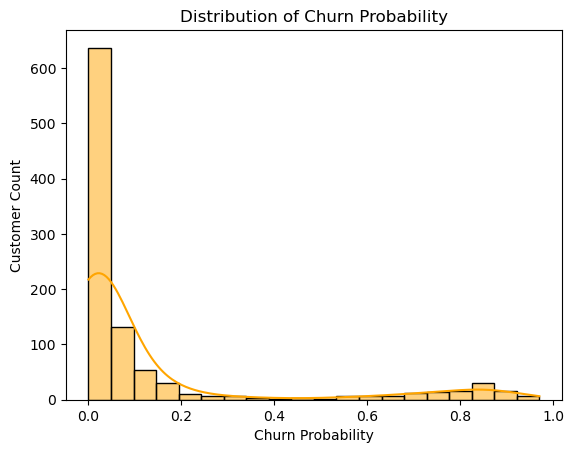

In [95]:
df['Churn_Probability'] = rf.predict_proba(X)[:, 1]
df['CHURN_FLAG'] = rf.predict(X)

sns.histplot(df['Churn_Probability'], bins=20, kde=True, color='orange')
plt.title('Distribution of Churn Probability')
plt.xlabel('Churn Probability')
plt.ylabel('Customer Count')
plt.show()